Modelo que representa la interacción entre planta, micorriza, fósforo y la calidad del suelo. La planta se ve influenciada por la presencia del hongo y las características físicas del suelo, pero el hongo también modifica las características físicas del suelo
Este modelo se describen mediante el siguiente conjunto de ecuaciones diferenciales:

\begin{equation}
\begin{aligned}
\frac{dP}{dt} &= r_P P \left( 1 - \frac{P}{K_P} \right) + \alpha M P g(F) \\
\frac{dM}{dt} &= r_M M \left( 1 - \frac{M}{K_M} \right) + \gamma P M h(F) \\
\frac{dF}{dt} &= F_{\text{add}} - u_P P - u_M M - d F \\
\frac{dS_f}{dt} &= k_{\text{bio}} M - d S_f
\end{aligned}
\end{equation}

donde las funciones que modulan la interacción en función del fósforo \(F\) son:

\begin{equation}
g(F) = \frac{F}{F + 1}
\end{equation}

\begin{equation}
h(F) = 1 - \frac{2}{1 + e^{-0.5 (F - F_{\text{thresh}})}}
\end{equation}


**Descripción de los parámetros:**


  - \(r_P \): tasa intrínseca de crecimiento de la planta.
  - \(K_P \): capacidad máxima de la planta.
  - \(r_M \): tasa intrínseca de crecimiento del hongo micorrízico.
  - \( K_M \): capacidad máxima del hongo.
  - \( \alpha \): beneficio que recibe la planta por la interacción mutualista con el hongo.
  - \( \gamma \): efecto del hongo sobre la planta (puede ser negativo en parasitismo).
  - \( u_P \): tasa de absorción de fósforo por la planta.
  - \( u_M \): tasa de absorción de fósforo por el hongo.
  - \( F_{\text{add}} \): entrada de fósforo artificial, simula fertilización.
  - \( d \): tasa de pérdida de fósforo o lixiviación.
  - \( k_{\text{bio}} \): tasa en que el hongo mejora la calidad del suelo.
  - \( S_f \): estado de la calidad del suelo.
  - \( F \): concentración de fósforo en el suelo.




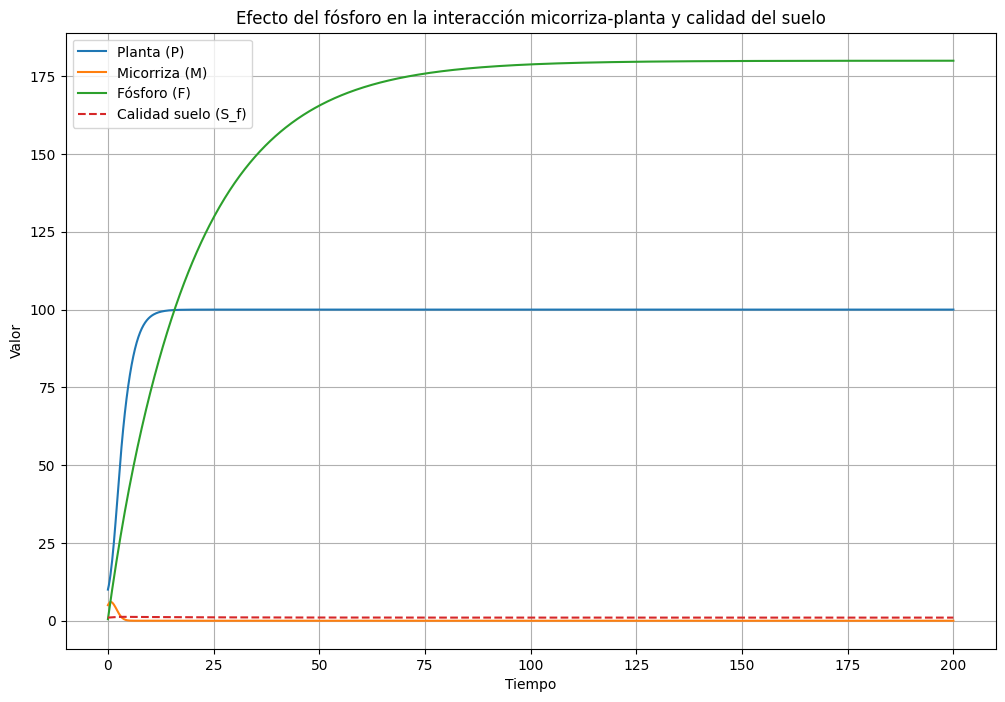

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Funciones del efecto del fósforo en la interacción
def g(F, F0=1):
    return F / (F + F0)

# Función que simula la transición del efecto del hongo según fósforo
def h(F, F_thresh=3):
    # Usamos una función sigmoide para suavizar la transición
    return 1 - 2 / (1 + np.exp(-0.5 * (F - F_thresh)))

# Modelo con efecto fosfórico y cambio en la interacción
def modelo(t, y, params):
    P, M, F, S_f = y
    r_P, K_P, r_M, K_M, alpha, gamma, delta, u_P, u_M, S, d, k_bio = params
    
    gF = g(F)
    hF = h(F)
    
    # La calidad del suelo, influenciada por el hongo
    dS_f_dt = k_bio * M - d * (S_f - 1)
    
    # Interacciones
    dP_dt = r_P * P * (1 - P / K_P) + alpha * M * P * gF
    dM_dt = r_M * M * (1 - M / K_M) + gamma * P * M * hF
    dF_dt = S - u_P * P - u_M * M - d * F
    
    return [dP_dt, dM_dt, dF_dt, dS_f_dt]

# Parámetros
params = {
    'r_P': 0.5,
    'K_P': 100,
    'r_M': 0.4,
    'K_M': 50,
    'alpha': 0.05,
    'gamma': 0.03,
    'delta': 0.1,
    'u_P': 0.01,
    'u_M': 0.02,
    'S': 10,
    'd': 0.05,
    'k_bio': 0.02
}

# Condiciones iniciales
y0 = [10, 5, 0.5, 1]

# Tiempo
t_span = [0, 200]
t_eval = np.linspace(t_span[0], t_span[1], 1000)


def rhs(t, y):
    return modelo(t, y, list(params.values()))


sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, method='RK45')

# Graficar resultados
plt.figure(figsize=(12,8))
plt.plot(sol.t, sol.y[0], label='Planta (P)')
plt.plot(sol.t, sol.y[1], label='Micorriza (M)')
plt.plot(sol.t, sol.y[2], label='Fósforo (F)')
plt.plot(sol.t, sol.y[3], label='Calidad suelo (S_f)', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Efecto del fósforo en la interacción micorriza-planta y calidad del suelo')
plt.legend()
plt.grid()
plt.show()

In [5]:
pip install -r requirements.txt

  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached corner-2.2.3-py3-none-any.whl.metadata (2.2 kB)
  Using cached ddeint-0.3.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached debugpy-1.8.12-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached distlib-0.3.9-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (101 kB)
  Using cached func_timeout-4.3.5-py3-none-any.whl
  Using cached geneticalgorithm-1.0.2-py3-none-any.whl.metadata (25 kB)
  Using cached ipython-8.32.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached multiprocess-0.7

In [7]:
!pip freeze > requirements.txt
